# Análise Exploratória — Risco de Crédito

Este notebook apresenta a etapa inicial de exploração dos dados
para um projeto de análise de risco de crédito.


## Importação de bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando conjunto de dados


In [3]:
path = r"..\data\raw\credit_risk_dataset.csv"
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Limpeza e Tratamento

In [5]:
# Resumo
ausentes = df.isna().sum()
ausentes_perc = round(((df.isna().sum() / len(df)) * 100),2)
cardinalidade = df.nunique()
tipos = df.dtypes

resumo = pd.DataFrame({
    "Tipos": tipos,
    "Cardinalidade": cardinalidade,
    "Ausentes": ausentes,
    "Ausentes (%)": ausentes_perc,
})
resumo = resumo.reset_index(names="Variável")
resumo

,Variável,Tipos,Cardinalidade,Ausentes,Ausentes (%)
0,person_age,int64,58,0,0.00
1,person_income,int64,4295,0,0.00
2,person_home_ownership,object,4,0,0.00
3,person_emp_length,float64,36,895,2.75
4,loan_intent,object,6,0,0.00
5,loan_grade,object,7,0,0.00
6,loan_amnt,int64,753,0,0.00
7,loan_int_rate,float64,348,3116,9.56
8,loan_status,int64,2,0,0.00
9,loan_percent_income,float64,77,0,0.00


In [6]:
# 1. Tratar Tempo de Emprego (Usando Mediana)
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())

# 2. Tratar Taxa de Juros (Usando a média por Grau de Empréstimo)
# Se o cliente tem Grade A, recebe a média de juros de A.
df['loan_int_rate'] = df['loan_int_rate'].fillna(
    df.groupby('loan_grade')['loan_int_rate'].transform('mean')
)

# 3. Remover duplicatas (Se houver)
df = df.drop_duplicates()

# Verificação final
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

**Resumo da etapa:**
Tratamento de dados ausentes utilizando Mediana para tempo de emprego e Média por Grupo para taxa de juros.

## Análise Univariada

### Descritivas

In [7]:
# Configurando estilo dos gráficos
sns.set(style="whitegrid")

In [8]:
# Estatísticas descritivas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32416.0,27.747008,6.354100,20.00,23.00,26.000000,30.000000,144.00
person_income,32416.0,66091.640826,62015.580269,4000.00,38542.00,55000.000000,79218.000000,6000000.00
person_emp_length,32416.0,4.768880,4.090411,0.00,2.00,4.000000,7.000000,123.00
loan_amnt,32416.0,9593.845632,6322.730241,500.00,5000.00,8000.000000,12250.000000,35000.00
loan_int_rate,32416.0,11.016116,3.220436,5.42,7.88,10.995555,13.463542,23.22
loan_status,32416.0,0.218688,0.413363,0.00,0.00,0.000000,0.000000,1.00
loan_percent_income,32416.0,0.170250,0.106812,0.00,0.09,0.150000,0.230000,0.83
cb_person_cred_hist_length,32416.0,5.811297,4.059030,2.00,3.00,4.000000,8.000000,30.00


**Insights:**
- person_age: média (27.74 anos) quase equivalente à mediana - 26 (sinal de simetria);
- person_income: renda pessoal assimétrica (média inflada por alguns indivíduos de renda muito alta);
- loan_status: a média dessa variável binária (0 = Adimplente; 1 = Inadimplente) representa o percentual de inadimplentes: 21.87%

## Análise de Inadimplência por Perfil de Risco

### Distribuição da Target: 'loan_status'

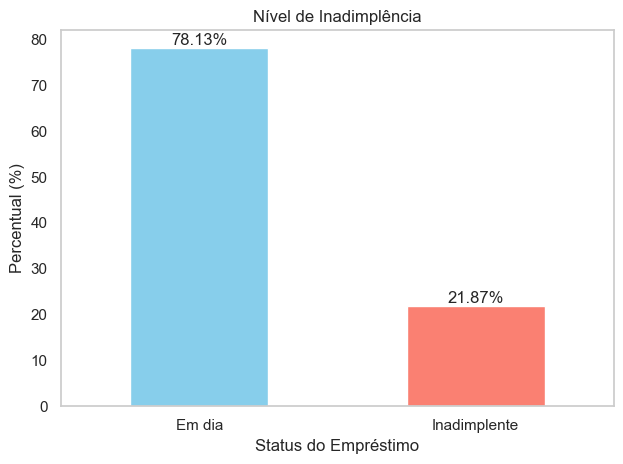

In [9]:
# Nível de inadimplência
inadimplencia = df['loan_status'].value_counts(normalize=True) * 100
inadimplencia.plot(kind='bar', color=['skyblue', 'salmon'])
plt.grid(False)
plt.title('Nível de Inadimplência')
plt.ylabel('Percentual (%)')
plt.xlabel('Status do Empréstimo')
plt.xticks(rotation=0)
plt.xticks(ticks=[0, 1], labels=["Em dia", "Inadimplente"])
plt.bar_label(plt.gca().containers[0], fmt='%.2f%%', label_type='edge')
plt.tight_layout()
plt.show()


### Distribuição do Perfil de Risco 'loan_grade'

C:\Users\Valdir D. Pereira\AppData\Local\Temp\ipykernel_12812\547549296.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='loan_grade', order=sorted(df['loan_grade'].unique()), palette='viridis')


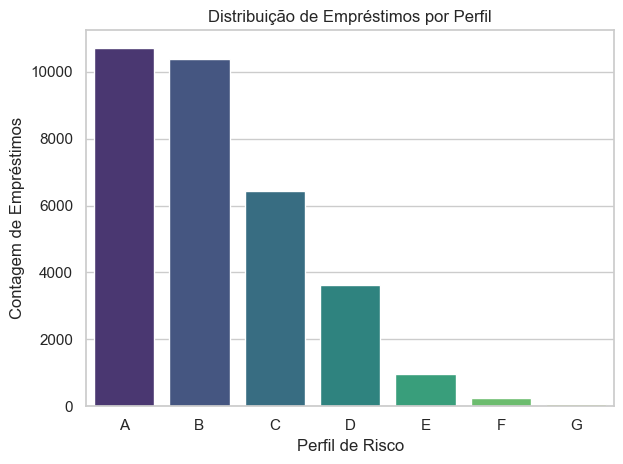

In [10]:
sns.countplot(data=df, x='loan_grade', order=sorted(df['loan_grade'].unique()), palette='viridis')
plt.title('Distribuição de Empréstimos por Perfil')
plt.xlabel('Perfil de Risco')
plt.ylabel('Contagem de Empréstimos')
plt.tight_layout()
plt.show()

In [11]:
tabela_perfil = pd.DataFrame(round(pd.crosstab(df["loan_grade"], df["loan_status"], normalize='index') * 100,2))
tabela_perfil.columns = ['Em dia (%)', 'Inadimplente (%)']
tabela_perfil = tabela_perfil.reset_index()
tabela_perfil["Aumento de inadimplência (%)"] = tabela_perfil["Inadimplente (%)"].diff().fillna(0)
tabela_perfil

,loan_grade,Em dia (%),Inadimplente (%),Aumento de inadimplência (%)
0,A,90.04,9.96,0.00
1,B,83.68,16.32,6.36
2,C,79.25,20.75,4.43
3,D,40.94,59.06,38.31
4,E,35.51,64.49,5.43
5,F,29.46,70.54,6.05
6,G,1.56,98.44,27.90


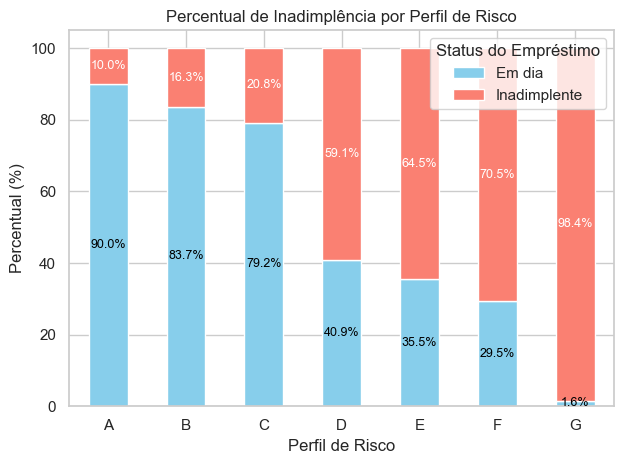

In [12]:
# Percentual de Inadimplência por Perfil
inadimplencia_perfil = df.groupby('loan_grade')['loan_status'].value_counts(normalize=True).unstack() * 100
ax = inadimplencia_perfil.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Percentual de Inadimplência por Perfil de Risco')
plt.xlabel('Perfil de Risco')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=0)
plt.legend(title='Status do Empréstimo', labels=['Em dia', 'Inadimplente'])

# Adiciona rótulos percentuais centralizados em cada segmento
for i, (_, row) in enumerate(inadimplencia_perfil.iterrows()):
    cum = 0
    for j, val in enumerate(row):
        if val <= 0:
            cum += val
            continue
        y = cum + val / 2
        color = 'white' if j == 1 else 'black'  # cor do texto dependendo do segmento
        if val >= 1:  # evita rótulos muito pequenos
            ax.text(i, y, f"{val:.1f}%", ha='center', va='center', color=color, fontsize=9)
        cum += val

plt.tight_layout()
plt.show()

**Insights:**
- A leitura que a instituição financeira faz do perfil de crédito dos aplicantes parece adequada para categorizar seus clientes em termos do risco de inadimplência. A segmentação de risco vai do melhor pagador até o pior, numa escala de "A" a "G";
- Como essa leitura se sustenta: o percentual de inadimplência, que começa em 10% no Perfil A, aumenta progressivamente ao longo da sequência de grupos e, definitivamente, dá um salto de magnitude a partir do Perfil D (59.1% de inadimplência vs 20.8% do grupo anterior).

## Análise de Inadimplência por Alavancagem
- "loan_percent_income" é a variável cuja relação com a target será estudada nessa sessão;
- O objetivo é entender como o nível de alavancagem (percentual da renda comprometido com a parcela do empréstimo) determina a inadimplência.

C:\Users\Valdir D. Pereira\AppData\Local\Temp\ipykernel_12812\8791578.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='loan_percent_income', palette='Set2')


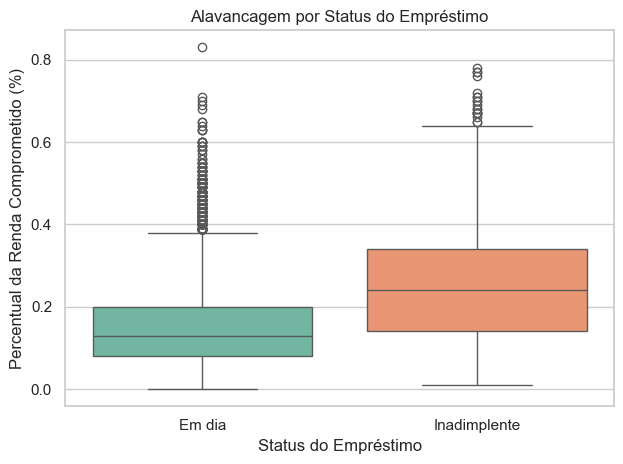

In [13]:
sns.boxplot(data=df, x='loan_status', y='loan_percent_income', palette='Set2')
plt.title('Alavancagem por Status do Empréstimo')
plt.xlabel('Status do Empréstimo')
plt.ylabel('Percentual da Renda Comprometido (%)')
plt.xticks(ticks=[0, 1], labels=["Em dia", "Inadimplente"])
plt.tight_layout()
plt.show()

In [14]:
df.groupby("loan_status")["loan_percent_income"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,25327.0,0.148794,0.087252,0.00,0.08,0.13,0.20,0.83
1,7089.0,0.246906,0.132103,0.01,0.14,0.24,0.34,0.78


In [15]:
# número de bins (ex.: 50 quantis)
bins = 50

# cortar em quantis e agregar
df2["bin"] = pd.qcut(df2["loan_percent_income"], q=bins, duplicates="drop")
bin_stats = (
    df2
    .groupby("bin")
    .agg(median_income=("loan_percent_income", "median"),
         defaults=("loan_status", "sum"),
         n=("loan_status", "count"))
    .reset_index(drop=True)
)

# cumulativos por bin
bin_stats["cum_defaults"] = bin_stats["defaults"].cumsum()
bin_stats["cum_n"] = bin_stats["n"].cumsum()
bin_stats["cum_default_rate"] = bin_stats["cum_defaults"] / bin_stats["cum_n"] * 100

# plot usando o valor mediano do bin no eixo x
plt.figure(figsize=(10, 6))
sns.lineplot(x="median_income", y="cum_default_rate", data=bin_stats, marker="o")
plt.xlabel("Percentual da renda comprometida (mediana do bin)")
plt.ylabel("Taxa acumulada de inadimplência (%)")
plt.title("Taxa acumulada por faixas (quantis)")
plt.grid(alpha=0.3)
plt.show()



NameError: name 'df2' is not defined

**Insights:**
- A alavancagem média dos aplicantes adimplentes é aproximadamente 15% (vs aprox. 25% dos inadimplentes)
- A taxa acumulada de inadimplência cresce num ritmo controlado até certo nível renda comprometida (30%), a partir do qual, o percentual de inadimplência assume uma trajetória ascendente mais acelerada;
- O níve de inadimplência nesse ponto de inflexão (30% de alavancagem) é algo próximo de 15-16%;
- **Sugestão:** Limitar a relação Parcela/Renda em 30%

## Análise de Correlação: Taxa de Juros vs Perfil de Risco (precificação)

Text(0.5, 1.0, 'Correlação: Taxa de Juros vs. Outras Variáveis')

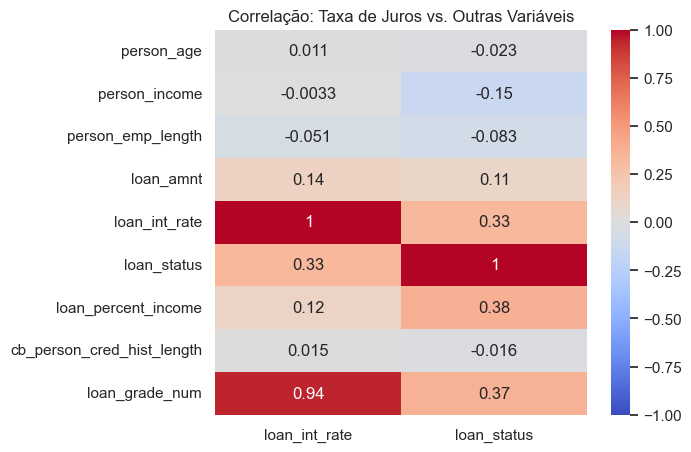

In [ ]:
# Mapeando: Transformar as letras em uma escala numérica
risk_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

# Criando a coluna numérica auxiliar
df['loan_grade_num'] = df['loan_grade'].map(risk_mapping)

# Agora geramos a matriz novamente INCLUINDO essa nova coluna
plt.figure(figsize=(6, 5))
corr = df.select_dtypes(include=['float64', 'int64']).corr()

# Focamos na correlação com a Taxa de Juros
sns.heatmap(corr[['loan_int_rate', 'loan_status']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação: Taxa de Juros vs. Outras Variáveis')

C:\Users\Valdir D. Pereira\AppData\Local\Temp\ipykernel_12812\3311047140.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_grade', y='loan_int_rate', data=df,


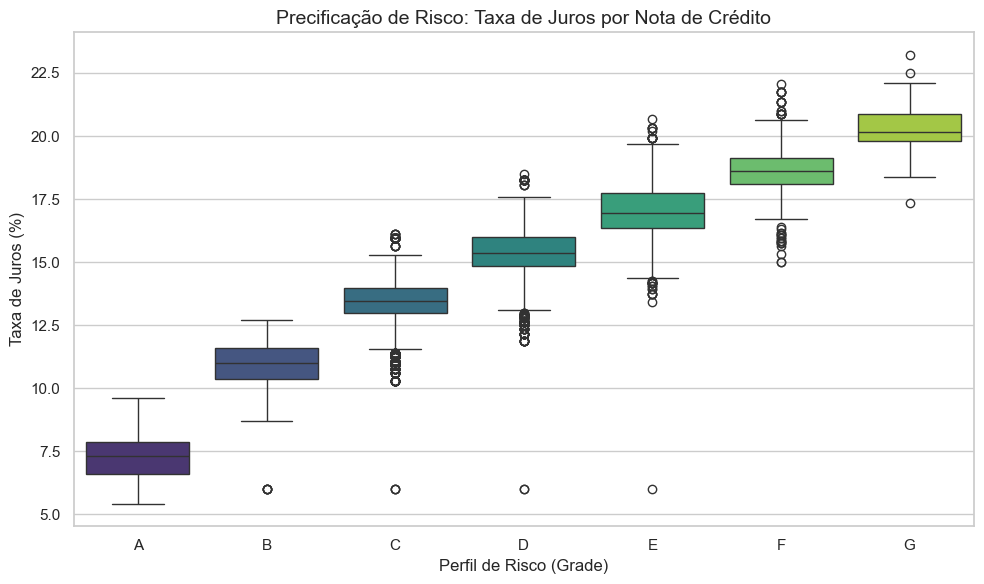

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_grade', y='loan_int_rate', data=df,
            order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], palette='viridis')

plt.title('Precificação de Risco: Taxa de Juros por Nota de Crédito', fontsize=14)
plt.xlabel('Perfil de Risco (Grade)', fontsize=12)
plt.ylabel('Taxa de Juros (%)', fontsize=12)
plt.tight_layout()
plt.show()

**Insights:**
- Há forte correlação entre Nota de Risco (perfil numérico) e Taxa de Juros do Empréstimo (0.94), e isso indica que a precificação bancária é capaz de variar a taxa de juros quase sempre que o perfil de risco aumenta;
- A forte correlação positiva entre Perfil de Risco e Taxa de Juros confirma a eficiência da precificação de risco. Nota-se que o spread bancário aumenta progressivamente para cobrir a probabilidade de default (PD) das categorias E, F e G.

In [17]:
# Configuração visual para ficar mais sério/profissional
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 10))

# Vamos dar uma olhada nas colunas que ignorámos
print("Variáveis disponíveis para a Fase 2:")
print(df.columns.tolist())

Variáveis disponíveis para a Fase 2:
['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']


<Figure size 1500x1000 with 0 Axes>